In [1]:
!pip install pandas seaborn matplotlib sklearn keras tensorflow --quiet

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
df.shape

(284807, 31)

In [7]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [8]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

In [9]:
fraud.shape

(492, 31)

In [10]:
normal.shape

(284315, 31)

In [11]:
fraud.shape[0] + normal.shape[0]

284807

In [12]:
print('Normal', round(fraud.shape[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(normal.shape[0]/len(df) * 100,2), '% of the dataset')

Normal 0.17 % of the dataset
Frauds 99.83 % of the dataset


In [13]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
sns.set()

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

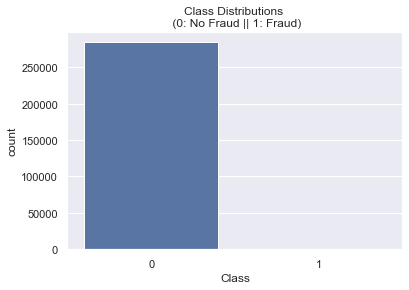

In [17]:
sns.countplot('Class', data=df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)')

In [18]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

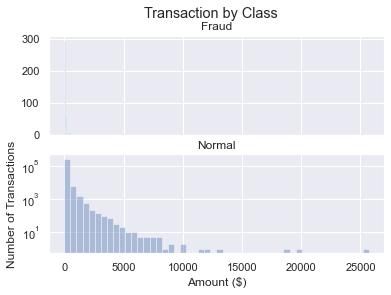

In [19]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

sns.distplot(fraud.Amount, bins=50, kde=False, ax=ax1, axlabel=False)
sns.distplot(normal.Amount, bins=50, kde=False, ax=ax2, axlabel=False)

f.suptitle('Transaction by Class')

ax1.set_title('Fraud')
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')

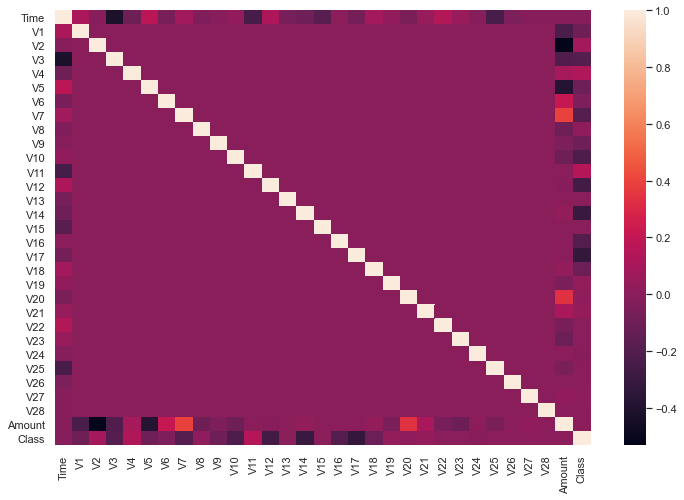

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr()) 

'Class' is less correlated with ‘Amount’ and ‘Time’ which suggests it is hard to predict whether transaction is fraudulent or not from ‘Amount’ and ‘Time’ details of transaction.

'Class' is negatively correlated with ‘V3’, ‘V7’, ‘V10’, ‘V12’, ‘V14’, ‘V17’ and positively correlated with ‘V2’, ‘V4’, ‘V11’. The other correlations are relatively small.

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
import numpy as np

RANDOM_SEED = 23

In [25]:
data = df.drop(['Time'], axis=1)
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [32]:
data.shape

(284807, 30)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Class',1) , data['Class'], test_size=0.25, random_state=RANDOM_SEED)

In [98]:
X_train_normal = X_train[y_train==0]
X_train_fraud = X_train[y_train==1]

In [99]:
input_layer = Input(shape=(29, ))
encoded = Dense(12,activation='tanh')(input_layer)
decoded = Dense(29,activation='sigmoid')(encoded)
autoencoder = Model(input_layer,decoded)

In [100]:
nb_epoch = 50
batch_size = 32

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(X_train_normal, X_train_normal,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Train on 213230 samples, validate on 71202 samples
Epoch 1/50
213230/213230 [==============================] - 12s 58us/step - loss: 0.8685 - accuracy: 0.5726 - val_loss: 0.8494 - val_accuracy: 0.6393
Epoch 2/50
213230/213230 [==============================] - 8s 36us/step - loss: 0.7975 - accuracy: 0.6543 - val_loss: 0.8301 - val_accuracy: 0.6610uracy: 0.
Epoch 3/50
213230/213230 [==============================] - 9s 40us/step - loss: 0.7855 - accuracy: 0.6674 - val_loss: 0.8228 - val_accuracy: 0.670085 - ac - ETA: 1s - loss: 0.7888 -  - ETA: 1s - loss: 0.787 - ETA: 0s - l
Epoch 4/50
213230/213230 [==============================] - 9s 41us/step - loss: 0.7805 - accuracy: 0.6758 - val_loss: 0.8186 - val_accuracy: 0.6764 3s - loss: 0.7800  - ETA: 3s - loss: 0.7814 - accura - ETA: 2s - loss: - ETA: 0s - loss: 0.7836 
Epoch 5/50
213230/213230 [==============================] - 9s 43us/step - loss: 0.7778 - accuracy: 0.6796 - val_loss: 0.8162 - val_accuracy: 0.6806- loss: 0.7451 -  - ETA: 

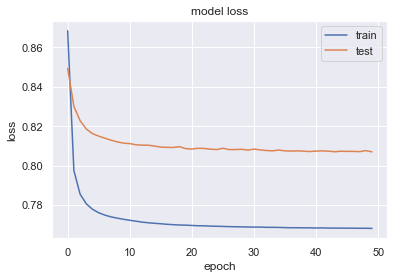

In [101]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [113]:
predictions = autoencoder.predict(X_train)
mse = np.mean(np.power(X_train - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_train})
error_df.groupby('true_class').describe()

reconstruction_error                                            \
                          count       mean        std       min       25%   
true_class                                                                  
0                      213230.0   0.767928   5.477299  0.038710  0.230725   
1                         375.0  24.656829  34.051194  0.108636  4.132875   

                                               
                  50%        75%          max  
true_class                                     
0            0.391113   0.644488  1861.907802  
1           10.049146  25.560090   204.529196

In [126]:
threshold = 15

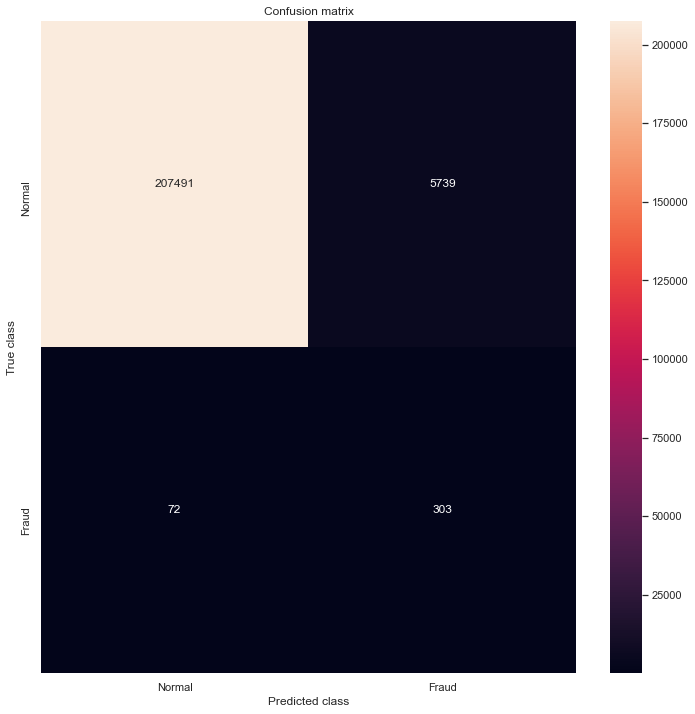

In [125]:
LABELS = ["Normal", "Fraud"]

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [145]:
threshold=0.0
f1=0
recall=0
accuracy=0
while (recall < 0.3 or accuracy < 0.9):
    print('==== ' + str(threshold) + '====')
    threshold += 0.01
    y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
    conf_matrix = confusion_matrix(error_df.true_class, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    precision = 1. * tp / (tp + fp)
    recall = 1. * tp / (tp + fn)
    f1 = (2 * recall * precision) / (recall + precision)
    print('TP:' + str(tp))
    print('FP:' + str(fp))
    print('TN:' + str(tn))
    print('FN:' + str(fn))
    accuracy = 1. * (tp + tn) / (tp + tn + fp + fn)
    print('Accuracy:' + str(accuracy))
    print('Precision:' + str(precision))
    print('Recall:' + str(recall))
    print('F1:' + str(f1))

==== 0.0====
TP:375
FP:213230
TN:0
FN:0
Accuracy:0.0017555768825636103
Precision:0.0017555768825636103
Recall:1.0
F1:0.0035050004673333954
==== 0.01====
TP:375
FP:213230
TN:0
FN:0
Accuracy:0.0017555768825636103
Precision:0.0017555768825636103
Recall:1.0
F1:0.0035050004673333954
==== 0.02====
TP:375
FP:213230
TN:0
FN:0
Accuracy:0.0017555768825636103
Precision:0.0017555768825636103
Recall:1.0
F1:0.0035050004673333954
==== 0.03====
TP:375
FP:213229
TN:1
FN:0
Accuracy:0.0017602584209171135
Precision:0.0017555851014025953
Recall:1.0
F1:0.0035050168474476465
==== 0.04====
TP:375
FP:213185
TN:45
FN:0
Accuracy:0.0019662461084712438
Precision:0.0017559468065180745
Recall:1.0
F1:0.0035057377240750695
==== 0.05====
TP:375
FP:212784
TN:446
FN:0
Accuracy:0.003843542988225931
Precision:0.0017592501372215108
Recall:1.0
F1:0.0035123212228497574
==== 0.060000000000000005====
TP:375
FP:211988
TN:1242
FN:0
Accuracy:0.007570047517614288
Precision:0.001765844332581476
Recall:1.0
F1:0.0035254632458705075
==

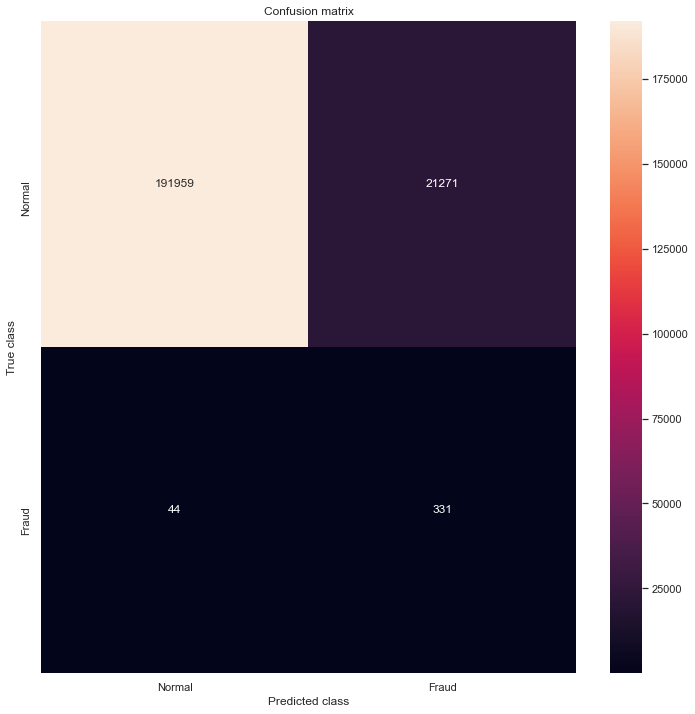

In [146]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()